# Projekt 1
  
W ramach zadania należy rozwiązać równanie przewodności cieplnej.  
1. Ocena dst lub dst+: zadanie 1  
2. Ocena db: zadanie 2  
3. Ocena bdb: zadanie 3 

## Jednowymiarowe zagadnienie przewodności cieplnej (heat equation)

Równanie:
$$\frac{\partial u}{\partial t} = a^2\frac{\partial^2u}{\partial x^2}$$
  
$0 < x < L, L = \pi$  
$t > 0$  
$a = 0.2$  

Warunek początkowy:  
$f(x) = u(x, 0) = 4\sin^3(2x)$  

Zerowe warunki brzegowe:  
$u(0, t) = u(\pi, t) = 0$

## Zadanie 1
  
Znaleźć rozwiązanie dla równania przewodności cieplnej za pomocą metody rozdzielenia zmiennych.  
Na ocenę 3: rozwiązanie bez użycia **sympy**  
Na ocenę 3.5: rozwiązanie z użyciem **sympy** (tj. znalezienie lub zweryfikowanie uzyskanych "ręcznie" rozwiązań dla równań na funkcję $X(x)$ oraz $T(t)$).  
  
Podpowiedź: Nalezy przyjąć stałą separacji $$\lambda = -\frac{X''(x)}{X(x)}$$.  
Końcowe rozwiązanie, podobnie jak rozwiązanie dla równania struny, ma postać nieskończonej sumy rozwiązań zależnych od indeksu $n = 1, 2, 3, ...$.

In [38]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

import math
from sympy import *
init_printing()

In [39]:
n,L,a,x,t,lambd = symbols('n L a x t lambda',positive=True)
L = pi

X = Function('X')
T = Function('T')
u = Function('u')


Przedstawiamy $u(x,t) = X(x) * T(t)$

$du/dt = X(x) * T'(t)$

$a^2 * d^2u/dx^2 = a^2 * X''(x) * T(t)$

Czyli:

$X(x) * T'(t) = a^2 * X"(x) * T(t)$

dzielimy obustronnie przez $(X(x)*T(t))$

$T'(t) / T(t) = a^2 * X"(x) / X(x)$

Teraz podstawiamy stałą separacji lambda i otrzymujemy dwa równania:
1) $T'(t)/T(t) = -a^2 * lambda$

1) $T'(t) + a^2 * lambda * T(t) = 0$

2) $lambda = -X''(x) / X(x)$

2) $X''(x) + lambda * X(x) = 0$

In [40]:
form = Eq(u(x,t).diff(t), a*a*u(x,t).diff(x,2))
separated = pde_separate(form, u(x, t), [X(x), T(t)])

#wpisujemy uzyskane funkcją pde_separate
separated_0 = separated[0]
separated_1 = separated[1]

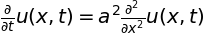

In [41]:

form


In [42]:
EquationX = separated_0.subs(separated_0,-lambd)
EquationX

Equation1 = Eq(X(x).diff(x,2)-EquationX*X(x),0)
FX = dsolve(Equation1)
FX

Przy pomocy uzyskanego wzoru na X(x), wyznaczymy $\lambda$:
(Interesuje nas tylko przypadek $$\lambda > 0$$ ponieważ w pozostałych przypadkach stałe wynoszą 0)

Wykorzystując warunek brzegowy:  
$X(0) = C_1 cos(0) + C_2 sin(0) = C_1 * 1 + C_2 * 0 = C_1 + 0 = 0 => C_1 = 0$ 
<br>
Uzyskujemy postać funkcji X(x): <br>
$X(x) = C_2 sin(\sqrt lambda * x)$
<br>


In [43]:
FX_subs = FX.subs(x,0)
C2 = FX_subs.rhs
FX_subs_C2 = FX.subs(C2*cos(sqrt(lambd)*x),0)
FX_subs_C2 = FX_subs_C2.rhs
FX_subs_C2 = FX_subs_C2.subs(sin(sqrt(lambd)),1)
FX_subs_C2

$X(L) = C_2 sin(\sqrt lambda * L) = 0$

Funkcja $sin(\theta)$ ma wartośc 0 dla argumentów $\theta$, które są całkowitymi wielokrotnościami liczby $\pi$, stąd:  
$\sqrt lambda * L = n\pi$  

$\sqrt lambda = \frac{n\pi}{L} $

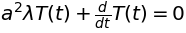

In [44]:
EquationT=Eq(T(t).diff(t)-EquationX*a**2*T(t),0)
EquationT

In [45]:
EquationX

$X(0) = C_1 sin(0) + C_2 cos(0) = C_1 * 0 + C_2 * 1 = C_2 + 0 = 0 => C_2 = 0$  
$X(x) = C_1 sin(\sqrt lambda * x)$

In [46]:
FT=dsolve(EquationT)
FT=FT.rhs
C1 = FT.subs(t,0)
FT

$X(L) = C_2 sin(\sqrt lambda * L) = 0$

$\sqrt lambda * L = n\pi$

$\sqrt lambda = \frac{n\pi}{L}, n = 1, 2, 3, ... $

Wyznaczone funkcje możemy podstawić do szukanej przez nas postaci iloczynu:


In [47]:
u = FX_subs_C2*FT
u = u.subs(C1*C1,C1)
u


### Kolejne zadania można rozwiązać z użyciem dowolnej biblioteki pozwalających tworzyć wykresy i animacje (może, ale nie musi to być biblioteka matplotlib).

## Zadanie 2
  
Zaprogramować znalezione w zadaniu 1 rozwiązanie, tj. zaimplementować funkcję $u(x, t)$ i zilustrować rozwiązanie na wykresach.
  
Na ocenę 4: poprawna implementacja funkcji $u(x, t)$ oraz przedstawienie rozwiązania na kilku (3-5) wykresach:  
Pierwszy wykres ma przedstawiać wykres funkcji $u(x, t)$ w momencie $t=0$, kolejne zaś funkcję $u(x, t)$ dla kolejnych momentów czasowych ($t>0$) dobranych tak, aby można było zaobserwować na kolejnych wykresach stopniowe wyrównywanie się temperatury.

In [48]:
a=0.2
n=np.arange(150)

def f(x):
  return 4*sin(2*x)**3

Res = [2/L * quad(lambda x: f(x)*np.sin(n*x), 0, L)[0] for n in range(0,150) ]

def u(x,t):
  if t<0:
    return None
  return sum(Res*np.exp(-a**2*n**2*t)*np.sin(n*x))
u=np.vectorize(u)


In [49]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()
ax.set_facecolor((0.1, 0.1, 0.1))

ax.plot(x, u(x,0))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [50]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()
ax.set_facecolor((0.1, 0.1, 0.1))

ax.plot(x, u(x,1))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [51]:
x = np.linspace(0,np.pi,150)
fig, ax = plt.subplots()
ax.set_facecolor((0.1, 0.1, 0.1))

ax.plot(x, u(x,2))

ax.set_ylim([-5, 5])
ax.grid(True)
plt.show()

<IPython.core.display.Javascript object>

# **Zadanie 3**
Zaprogramować animację, przedstawiającą przebieg rozkładu temperatury w czasie (wyrównywanie się temperatury).


In [53]:
from matplotlib import rc
rc('animation', html='jshtml')
%matplotlib notebook

import matplotlib.animation as animation

fs_approx = np.array([u(x, t) for t in range(1, 150)])
fig, ax = plt.subplots(figsize=(7,7))
line, = ax.plot(x, u(x,0))
ax.set_ylim([-5, 5])
ax.grid(True)
ax.set_facecolor((0.1, 0.1, 0.1))


def animate(i):
    line.set_ydata(u(x,i))  
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 20,1), interval=1, repeat=False, blit=True)
ani

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>